# Investigate Titanic Dataset

## 1. Load Data from CSV

In [168]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The following code reads all Titanic passengers data into Pandas DataFrame.
path = '~/documents/nd/da/p2/'
titanic_df = pd.read_csv(path + 'titanic_data.csv')
test_df = pd.read_csv(path + 'test.csv')
test_survived_df = pd.read_csv(path + 'gendermodel.csv')

Populating the interactive namespace from numpy and matplotlib


## 2. Data Fixing and Cleaning

In [169]:
# Concatenate test.csv and gendermodel.csv into titanic_df
# Replace the NaN in column Age to age's median.
# Change Sex string(male, female) to value 1, 0 
# Chang ports' name(C = Cherbourg; Q = Queenstown; S = Southampton) to 1, 2, 3
# Remove the column of Name, Sibsp, Parch, Ticket, Cabin

test_df = test_df.drop('PassengerId', axis=1)
temp_df = pd.concat([test_survived_df, test_df], axis=1)
titanic_df = pd.concat([titanic_df, temp_df], ignore_index=True)
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df.replace(to_replace=['male','female'], value=[1,0], inplace=True)
titanic_df.replace(to_replace=['C','Q','S'], value=[1,2,3], inplace=True)
titanic_df = titanic_df.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'],axis=1)
print titanic_df.tail()

      PassengerId  Survived  Pclass  Sex   Age      Fare  Embarked
1304         1305         0       3    1  28.0    8.0500       3.0
1305         1306         1       1    0  39.0  108.9000       1.0
1306         1307         0       3    1  38.5    7.2500       3.0
1307         1308         0       3    1  28.0    8.0500       3.0
1308         1309         0       3    1  28.0   22.3583       1.0


## 3. Data Exploring

In [170]:
#Exploring data

survivor_df = titanic_df[titanic_df['Survived'] == 1] # create a new df of all survivors
victim_df = titanic_df[titanic_df['Survived'] == 0]   # create a new df of all victims

total_passengers = len(titanic_df)
total_survivors = len(survivor_df)
survival_rate = titanic_df['Survived'].value_counts(normalize=True)

print "---- Basic Information ----"
print "Total {} passengers onboard, and {} of passengers survived.".format(total_passengers, total_survivors) 
print "Total survial rate is {}.".format(str(round(survival_rate[1],3)*100)+'%')
print ""

print "---- Age related statistics ----"
min_ages = titanic_df.groupby('Survived')['Age'].min()
print "The youngest survivor is {} year old and victim is {} year old".format(min_ages[1], min_ages[0])
max_ages = titanic_df.groupby('Survived')['Age'].max()
print "The oldest survivor is {} years old and victim is {} years old".format(max_ages[1], max_ages[0])
print "The average age is ",round(titanic_df['Age'].mean(),1)
print ''

print "---- Gender related statistics ----"
print titanic_df['Sex'].value_counts()
print titanic_df['Sex'].value_counts(normalize=True)
print "Total survival by Gender"
print titanic_df.groupby('Sex')['Survived'].sum()
print ""

print "---- Embarked related statistics ----"
print titanic_df['Embarked'].value_counts()
print titanic_df['Embarked'].value_counts(normalize=True)
print ""

print "---- Survived by Pclass ----"
print "Total passengers by Pclass " 
print titanic_df['Pclass'].value_counts()
print "Total Survival by Pclass "
print titanic_df.groupby('Pclass')['Survived'].sum()

---- Basic Information ----
Total 1309 passengers onboard, and 494 of passengers survived.
Total survial rate is 37.7%.

---- Age related statistics ----
The youngest survivor is 0.17 year old and victim is 0.33 year old
The oldest survivor is 80.0 years old and victim is 74.0 years old
The average age is  29.5

---- Gender related statistics ----
1    843
0    466
Name: Sex, dtype: int64
1    0.644003
0    0.355997
Name: Sex, dtype: float64
Total survival by Gender
Sex
0    385
1    109
Name: Survived, dtype: int64

---- Embarked related statistics ----
3.0    914
1.0    270
2.0    123
Name: Embarked, dtype: int64
3.0    0.698243
1.0    0.206264
2.0    0.093965
Name: Embarked, dtype: float64

---- Survived by Pclass ----
Total passengers by Pclass 
3    709
1    323
2    277
Name: Pclass, dtype: int64
Total Survival by Pclass 
Pclass
1    186
2    117
3    191
Name: Survived, dtype: int64


### 3.1 Descriptive Statistics
- Base on Titanic Dataset, there are total 1309 passengers onboard, and 494 of passengers survived, the total survial    rate is 37.7%.                      
- The average age is 29.5 years old, the youngest survivor is 0.17 year old and victim is 0.33 year old, the oldest      survivor is 80.0 years old and victim is 74.0 years old.               
- among all the passengers, total 843 males, the proportion of 64.4%, 109 of them survived. Total 466 females, the          proportion of 35.6%, 385 of them survived.               
- 69.8% of passengers(914) embarked from port Southampton,20.6% of passengers(270) embarked from port Cherbourg, 9.6%    of passengers(123) embarked from port Queenstown.                 
- 323 passengers stayed in the first class cabin, 186 of them survived. 277 passengers stayed in the second class        cabin, 117 of them survived. 709 passengers stayed in the third class cabin, 191 of them survived.  




## 4. Predictions and Analysis
   Accroding the Section 3.1 descriptive statistics, my questions: Is there a relationship between Survival and Cabin Classis? Would females have more survived rate than males? Is there a relationship between  Survival and Ebarked ports? what is the relatinship between Survival and Ages?
   My prediction: Females would have more survival rate than males. First class cabin would have the highest survial rate than others, and Survival rate does not related to Age. 

In [171]:
# Define functions to get total numbers, ratio and total ratio 

#caculate total numbers of one column by particular group(Gender, Pclass, and Embarked)
def total_number(df, column, key): 
    col_df = df[column]
    return len(col_df[col_df == key])

# caculate the ratio of surivior or vitim by partiular group
def ratio(df, column, key): 
    rate = total_number(df, column, key)/float(total_number(titanic_df, column, key))
    rate = round(rate, 3)
    return str(rate*100)+'%'

# caculate total ratio by column(Gender, Pclass, Embarked)
def total_ratio(column): 
    survivor_ratio = []
    victim_ratio = []
    if column == 'Sex':
        for i in range(0,2):
            survivor_ratio.append(ratio(survivor_df, column, i))
            victim_ratio.append(ratio(victim_df, column, i))
    else:
        for i in range(1,4):
            survivor_ratio.append(ratio(survivor_df, column, i))
            victim_ratio.append(ratio(victim_df, column, i))
    return [survivor_ratio, victim_ratio]


### 4.1 Pclass vs. Survived?
To compare the Survival Rates between three Cabin Classes, statistical tests will be run. Since Survival is a categorical dependent variable, an Chi-Squared test for categorical data is an appropriate statistical test(set p_critical = 0.05).

In [172]:
# Analysis relationship between Cabin Classes and Survival

# Create a Contingency Table to examine relationships between categorical variables.

from scipy import stats

pivot = pd.pivot_table(data = titanic_df[['Survived', 'Pclass']], index = 'Survived', columns = ['Pclass'], aggfunc = len)
print pivot,"\n"

# Using Contingency Table pivot to run Chi-Squared Test.
chi2, p_value, dof, expected = stats.chi2_contingency(pivot)

print "Results of Chi-Squared test on Pclass to Survival:"
print "Chi-Squared Score = ",round(chi2,2)
print "P-value = ", p_value


Pclass      1    2    3
Survived               
0         137  160  518
1         186  117  191 

Results of Chi-Squared test on Pclass to Survival:
Chi-Squared Score =  91.72
P-value =  1.20908522759e-20


#### Please see Section 4.1.1 for the detail analysis.

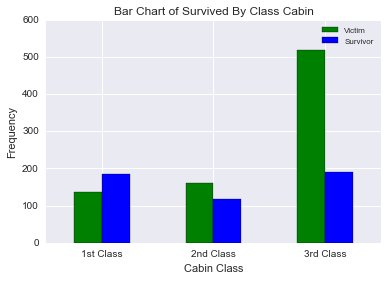

            1st    2nd    3rd
Survivor  57.6%  42.2%  26.9%
Victim    42.4%  57.8%  73.1%


In [185]:
# Visualizing "Pclass" - "Survived" with bar chart

pd.crosstab(titanic_df['Pclass'], titanic_df['Survived']).plot(kind='bar', color=['green','blue'])

ax = plt.gca()
ax.set_xticklabels(('1st Class','2nd Class', '3rd Class'),rotation=0)
plt.xlabel('Cabin Class')
plt.ylabel('Frequency')
plt.title("Bar Chart of Survived By Class Cabin")
plt.legend(('Victim','Survivor'),prop={'size': 8})

plt.show()

#Caculate Surival ratio by Pclass
Pclass_ratio_df = pd.DataFrame(data =total_ratio('Pclass'), index = ['Survivor','Victim'],
                               columns =['1st','2nd','3rd'])
print Pclass_ratio_df

#### 4.1.3 Interpretation
   According chi-square test results, since the P-value(1.21e-20) is less than the critical level(0.05), we reject the Null Hypothesis. Thus, we conclude that there is a statistically significant relationship between Survival and Cabin Class, we know that the first-class cabin has the highest survived rate, then the second-class cabin, and the third one. Please see the the bar chart and Survival ratio table above.

### 4.2 Gender vs. Survived?
To compare the Dependent_Variable, Surival(a categorical variable:0,1) of two Independent_Variable(Female/Male), Difference in Proportions Z-test will be an appropriate statistical test(set p_critical = 0.05). 

In [175]:
from statsmodels.stats.proportion import proportions_ztest

#Create a Contingency Table to get total survival numbers grouped by Gender categories
count = pd.pivot_table(data = survivor_df[['Survived', 'Sex']], columns = ['Sex'], values = 'Survived', aggfunc = len)
print "Total survival numbers grouped by Gender:"
print count,"\n"

#Create a Contingency Table to get total onboard numbers grouped by Gender categories
nobs = pd.pivot_table(data = titanic_df[['Survived','Sex']], columns = ['Sex'], values='Survived',aggfunc = len)
print "Total onboard numbers grouped by Gender:"
print nobs, "\n"

#Running Two-proportion Z-test
zstat, p_value = proportions_ztest(count, nobs, value=0)

print "Results of  Z-test on Gender to Survival:"
print "Z-test Score = ",round(zstat,2)
print "P-value = ", p_value


Total survival numbers grouped by Gender:
Sex
0    385
1    109
Name: Survived, dtype: int64 

Total onboard numbers grouped by Gender:
Sex
0    466
1    843
Name: Survived, dtype: int64 

Results of  Z-test on Gender to Survival:
Z-test Score =  24.91
P-value =  6.51324462992e-137


#### Please see Section 4.2.1 for the detail analysis.

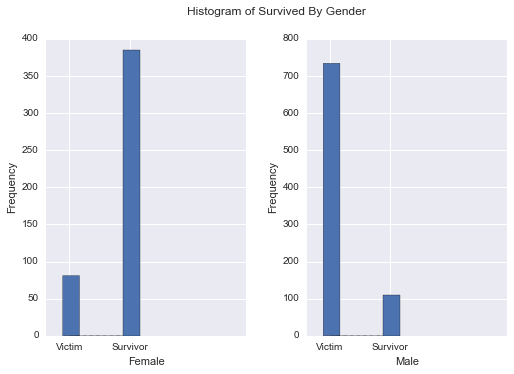

         Female   Male
Survivor  82.6%  12.9%
Victim    17.4%  87.1%


In [165]:
# Visualizing "Gender" - "Survived" with bar chart

ax = titanic_df['Survived'].hist(by=titanic_df['Sex'])

x_labels = ["Victim","Survivor"]
for i in range(2):
    x0, x1 = ax[i].get_xlim()
    ax[i].set_xlim(x0 -0.25, x1 +1.75)
    plt.setp(ax[i].containers, width=0.25)
    ax[i].set_xticks([0.1, 1]) 
    ax[i].set_xticklabels(x_labels, rotation=0)
    ax[i].set_title(' ')
    ax[i].set_ylabel('Frequency')

ax[0].set_xlabel('Female')
ax[1].set_xlabel('Male')

plt.suptitle("Histogram of Survived By Gender")
plt.show()

#Caculate Surival ratio by Gender
sex_ratio_df = pd.DataFrame(data = total_ratio('Sex'), index = ['Survivor','Victim'],
                            columns = ['Female','Male'])
print sex_ratio_df


#### 4.2.1 Interpretation:
   According Two-proportion Z-test results, since the P-value(6.51e-137) is less than the critical level(0.05), we reject the Null Hypothesis. Thus, we conclude that there is a statistically significant relationship between Survival and Gender, clearly shown that Female would have higher survival rate than Male. Please see the bar chart and ratio table above.

### 4.3 Age  vs. Survived?
To compare the survival by Age, since Age is continuous variable, T_test will be an appropriate statistical test for two groups(Survivor/victim, set p_critical = 0.05) 

In [180]:
# T_test for age of surviror and victim groups

tstat, p_value = stats.ttest_ind(survivor_df['Age'], victim_df['Age'])

print "Results of  T-test on Age to Survival:"
print "T-test Score = ",round(tstat,2)
print "P-value = ", p_value

Results of  T-test on Age to Survival:
T-test Score =  -1.57
P-value =  0.117507296587


#### Please see Section 4.3.1 for the detail analysis.

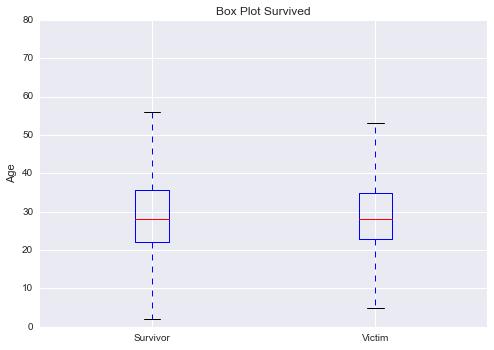

In [11]:
# Visualizing "Age" - "Survived" with Boxplot
box = plt.figure() 
ax = box.add_subplot(111)
x1 = survivor_df['Age'] 
x2 = victim_df['Age']  
x_labels = ['Survivor','Victim']  
ax.boxplot([x1,x2], labels = x_labels)  
ax.set_ylabel('Age') 
ax.set_title('Box Plot Survived') 

plt.show()

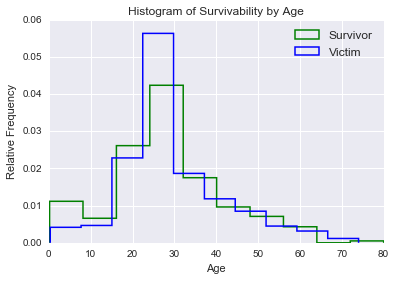

In [181]:
# Visualizing "Age" - "Survived" with Histogram chart

plt.hist(survivor_df['Age'], normed=1, histtype='step', color ='green', label = 'Survivor', linewidth=1.5)
plt.hist(victim_df['Age'], normed=1, histtype='step', color = 'blue', label = 'Victim', linewidth=1.5)
plt.title("Histogram of Survivability by Age")
plt.legend(prop={'size': 12})
plt.xlabel('Age')
plt.ylabel('Relative Frequency')

plt.show()


#### 4.3.1 Interpretation:
Since p_value(0.1175) is large than 0.05. Thus, we conclude that there is not a significant relationship between Survival and Age. Please see the boxplot and step histogram charts above.

### 4.4 Embarked vs. Survived?
To compare the survival rates between three embarked ports, statistical tests will be run. Since Survival is a categorical dependent variable. An chi-squared test for categorical data is an appropriate statistical test(set p_critical = 0.05).

In [13]:
# Analysis relationship between Embarked Ports and Survival

# Create a Contingency Table to examine relationships between categorical variables.
pivot = pd.pivot_table(data = titanic_df[['Survived', 'Embarked']], 
                       index = 'Survived', columns = ['Embarked'], aggfunc = len)

print pivot,"\n"

# Using Contingency Table pivot to run Chi-Squared Test.
chi2, p_value, dof, expected = stats.chi2_contingency(pivot)

print "Results of Chi-Squared test on Embarekd Ports to Survival:"
print "Chi-Squared Score = ",round(chi2,2)
print "P-value = ", p_value

Embarked  1.0  2.0  3.0
Survived               
0         137   69  609
1         133   54  305 

Results of Chi-Squared test on Embarekd Ports to Survival:
Chi-Squared Score =  24.68
P-value =  4.36358318208e-06


#### Please see Section 4.4.1 for the detail analysis.

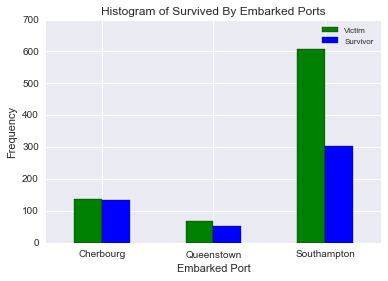

         Cherbourg Queenstown Southampton
Survived     49.3%      43.9%       33.4%
Victim       50.7%      56.1%       66.6%


In [189]:
# Visualizing "Embarked Ports" - "Survived" with bar chart
pd.crosstab(titanic_df['Embarked'], titanic_df['Survived']).plot(kind='bar', color=color)

ax = plt.gca()
ax.set_xticklabels(('Cherbourg', 'Queenstown', 'Southampton'),rotation=0)
plt.xlabel('Embarked Port')
plt.ylabel('Frequency')
plt.title('Histogram of Survived By Embarked Ports')
plt.legend(('Victim','Survivor'),prop={'size': 8})

plt.show()

#Caculate Surival ratio by embarked ports
Embarked_ratio_df = pd.DataFrame(data =total_ratio('Embarked'), index = ['Survived','Victim'], 
                                 columns =['Cherbourg', 'Queenstown', 'Southampton'])
print Embarked_ratio_df

#### 4.4.1 Interpretation:
According chi-square test results, Since the P-value(4.36e-06) is less than the critical level(0.05), we cannot accept the null hypothesis. Thus, we conclude that there is a relationship between Survival and Embarked Ports. Please see the bar chart and the ratio table above.

### 4.5 PassengerID vs. Survived?

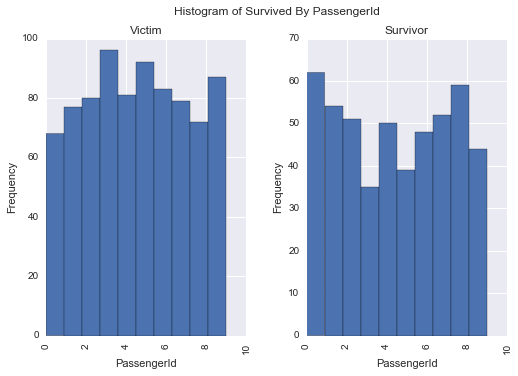

In [15]:
# Get the last digit of the PassengerId

def get_last_digi(x): 
    return int(str(x)[-1])

last_digi_pid = titanic_df['PassengerId'].apply(get_last_digi)

ax = last_digi_pid.hist(by=titanic_df['Survived'])
ax[0].set_title('Victim')
ax[1].set_title('Survivor')
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')
ax[0].set_xlabel('PassengerId')
ax[1].set_xlabel('PassengerId')

plt.suptitle("Histogram of Survived By PassengerId")

plt.show()

#### 4.5.1 Interpretation
  I know that the PassengerIds were probably generated by system. However, I am a little bit superstition and curious what the most lucky/unlucky numbers are. We can find out from above charts that the Passengers with 0 or 8 Id got most chance to survived, likewise, 3 and 5 are most unlucky numbers    

## 5. Conclusion
- Based on the above investigation, the final conculsion would be : Females would have more survival rate than males. Passengers who stayed in first class cabin would have the highest survived rate than others classes. Passengers embarked from Cherbourg or Queenstown would have more survived rate than those from Southampton. Survival rate does not related to Age.
- One simple thought of the survial rate, were there enough lifeboats on board? The final conculsions are just based on the current dataset information, I think we need at least one important information to do further investigation, the lifeboats information, like: How many lifeboats, were they enough for all passengers? Where were they located, Were they near first cabin class? I think all those factors will impact our analysis.

## 6.References
(1) Statwing website: titanic demo (https://www.statwing.com/demos/titanic#workspaces/8497)                    
(2) SciPy Reference Guide (http://docs.scipy.org/doc/scipy/reference/index.html)                    
(3) Matplotlib Guide (http://matplotlib.org/index.html)                    
(4) Pandas Documentation (http://pandas.pydata.org/pandas-docs/stable/index.html)            
(5) Udacity forum: discussions.udacity.com             
(6) Udacity DA and Statistics courses                
(7) David R. Anderson, Dennis J. Sweeney, Tomas A. Williams Statistics for Business and Economics (11th Edition)